In [1]:
from lensid.utils.ml_utils import *

2021-09-02 21:40:15.235099: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2021-09-02 21:40:15.235151: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
indir= 'test'
#df_dir='../../data/dataframes/test/' ##alice
df_dir = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/test/' ##CIT

In [3]:
#blu_lensed = '../../data/dataframes/haris_et_al/Lensed_PE_blus.csv'
#blu_unlensed = '../../data/dataframes/haris_et_al/Unlensed_PE_blus.csv'

blu_lensed = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/haris_et_al/Lensed_PE_blus.csv'
blu_unlensed = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/haris_et_al/Unlensed_PE_blus.csv'



In [4]:
tag='_kaggle'
df_lensed_qts = pd.read_csv(df_dir+'lensed_QTs'+tag+'.csv',index_col=[0] )
df_unlensed_qts = pd.read_csv(df_dir+'unlensed_QTs'+tag+'.csv' ,index_col=[0])


df_test_blu_lensed = pd.read_csv(blu_lensed,index_col=[0] )
df_test_blu_unlensed = pd.read_csv(blu_unlensed,index_col=[0] )
cols=['m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2']
df_lensed_qts=df_lensed_qts.join(df_test_blu_lensed[cols])
df_unlensed_qts=df_unlensed_qts.join(df_test_blu_unlensed[cols])
df_test_qts = pd.concat([df_lensed_qts,df_unlensed_qts],ignore_index = True)
df_test_qts=df_test_qts.sample(frac = 1).reset_index(drop = True)

In [5]:
df_test_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,...,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec","# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2","m1, m2, ra, sin_dec","m1, m2"
499787,667079000.000000000-334158,576962500.000000000-153925,0,0.637461,7859.591797,0.115488,4584.572754,0.015225,6714.027344,0.100232,...,0.738832,7250.063477,0.106646,4445.905273,0.253307,6.436920e-01,5.225608e-01,0.419582,9.141136e-01,1.753675
499788,607462000.000000000-214924,696716000.000000000-393432,0,0.004627,5818.483887,0.091748,6218.944824,0.036605,6018.856445,0.095090,...,0.002069,6771.584473,0.102601,5651.134277,5.247192,4.303161e+00,1.511047e-02,5.858758,3.097330e+00,39.851545
499789,589797500.000000000-179595,579418000.000000000-158836,0,0.312667,6343.018555,0.098617,7088.735352,0.000066,6103.750000,0.095511,...,0.000021,5981.861328,0.094203,6044.817871,34.760420,9.935406e+01,1.282467e+00,48.440755,1.135769e+02,88.890527
499790,602869000.000000000-205738,662411500.000000000-324823,0,0.185327,7531.535645,0.107880,5355.600586,0.091188,7429.014648,0.110922,...,0.000395,7277.281738,0.106378,4616.075195,0.522177,7.704474e-01,2.162637e-01,0.746299,9.476203e-01,12.327372
499791,539775000.000000000-79550,511308500.000000000-22617,0,0.942023,6070.066406,0.103816,4880.656250,0.039548,6239.149902,0.105699,...,0.286930,7926.032227,0.113860,4640.717773,0.000004,2.519987e-09,3.050427e-12,0.000002,8.659782e-11,0.002266


In [8]:
xgboost_dense_qts_model = joblib.load('../training_cv/out/XGBQT_0'+tag+'.pkl')

In [9]:
df_test_qts=predict_xgboost_dense_qts(df_test_qts,xgboost_dense_qts_model)
df_test_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,...,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec","# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2","m1, m2, ra, sin_dec","m1, m2",xgb_dense_QTS_0
499787,667079000.000000000-334158,576962500.000000000-153925,0,0.637461,7859.591797,0.115488,4584.572754,0.015225,6714.027344,0.100232,...,7250.063477,0.106646,4445.905273,0.253307,6.436920e-01,5.225608e-01,0.419582,9.141136e-01,1.753675,0.000908
499788,607462000.000000000-214924,696716000.000000000-393432,0,0.004627,5818.483887,0.091748,6218.944824,0.036605,6018.856445,0.095090,...,6771.584473,0.102601,5651.134277,5.247192,4.303161e+00,1.511047e-02,5.858758,3.097330e+00,39.851545,0.000028
499789,589797500.000000000-179595,579418000.000000000-158836,0,0.312667,6343.018555,0.098617,7088.735352,0.000066,6103.750000,0.095511,...,5981.861328,0.094203,6044.817871,34.760420,9.935406e+01,1.282467e+00,48.440755,1.135769e+02,88.890527,0.000011
499790,602869000.000000000-205738,662411500.000000000-324823,0,0.185327,7531.535645,0.107880,5355.600586,0.091188,7429.014648,0.110922,...,7277.281738,0.106378,4616.075195,0.522177,7.704474e-01,2.162637e-01,0.746299,9.476203e-01,12.327372,0.000016
499791,539775000.000000000-79550,511308500.000000000-22617,0,0.942023,6070.066406,0.103816,4880.656250,0.039548,6239.149902,0.105699,...,7926.032227,0.113860,4640.717773,0.000004,2.519987e-09,3.050427e-12,0.000002,8.659782e-11,0.002266,0.000427


In [10]:
df_test_qts=df_test_qts.dropna()

ML H1 QTs auc = 0.8790
ML L1 QTs auc = 0.8695
ML V1 QTs auc = 0.8018
ML combined H1 L1 V1 QTS auc = 0.9021
$B^L_U:$ $m_1 m_2$ auc = 0.9164


/home/srashti.goyal/.local/lib/python3.7/site-packages/lensid/utils/ml_utils.py:847: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


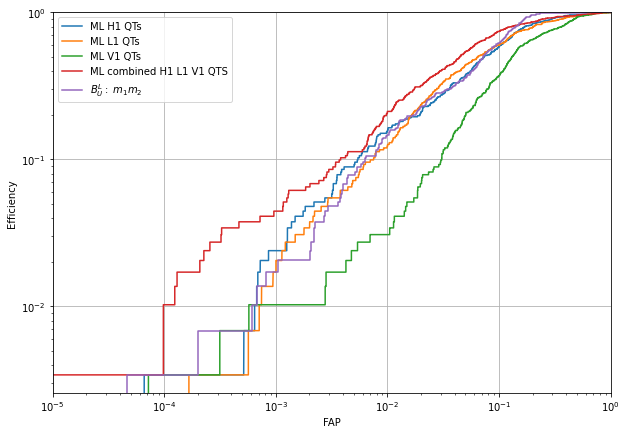

In [11]:
fig=plot_ROCs(df_test_qts,cols=['dense_H1_0' ,'dense_L1_0','dense_V1_0','xgb_dense_QTS_0','m1, m2']\
                     ,labels=['ML H1 QTs', 'ML L1 QTs', 'ML V1 QTs','ML combined H1 L1 V1 QTS', '$B^L_U:$ $m_1 m_2$'],logy=True)

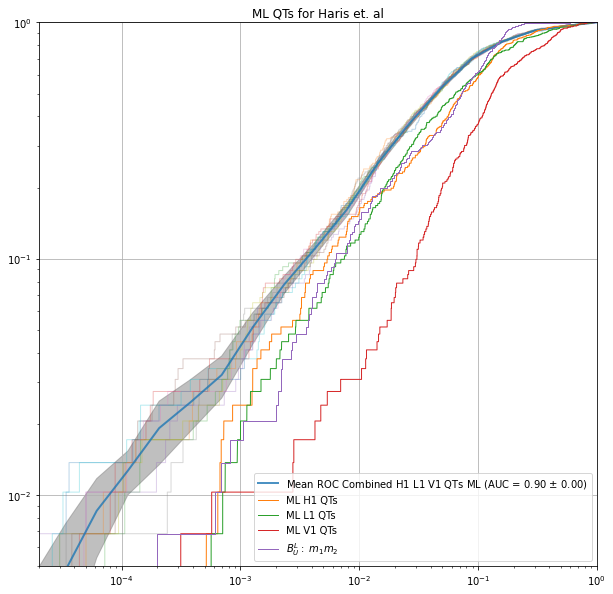

In [12]:
from sklearn.metrics import plot_roc_curve
plt.rcParams["figure.figsize"] = (10,10)

tprs = []
aucs = []

mean_fpr = 10**np.linspace(-5,0,20)
    
fig,ax = plt.subplots()
cols=['dense_H1_0','dense_L1_0','dense_V1_0']

for i in range(1,11):
    xgb_qt_cv = joblib.load("../training_cv/out/XGBQT_"+str(i)+tag+".pkl")
    df = predict_xgboost_dense_qts(df_test_qts,xgb_qt_cv)
    df_test_qts['xgb_dense_QTS_' +str(i) ]=df['xgb_dense_QTS_0']

    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test_qts.Lensing.values, df_test_qts['xgb_dense_QTS_' +str(i)])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    ax.plot(false_positive_rate,true_positive_rate,alpha=0.3,lw=1)
    interp_tpr = np.interp(mean_fpr,false_positive_rate,true_positive_rate)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    

    
mean_tpr = np.mean(tprs,axis = 0)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr,mean_tpr,label = r'Mean ROC Combined H1 L1 V1 QTs ML (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc , std_auc),lw = 2,alpha=.8)
    
std_tpr = np.std(tprs,axis=0)
tprs_upper = np.minimum(mean_tpr +std_tpr,1)
tprs_lower = np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color="grey",alpha=.5)


colors=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
cols=['dense_H1_0' ,'dense_L1_0','dense_V1_0','m1, m2']

labels=['ML H1 QTs', 'ML L1 QTs', 'ML V1 QTs', '$B^L_U:$ $m_1 m_2$']

for i,col in enumerate(cols):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test_qts.Lensing.values, df_test_qts[col])
    plt.plot(false_positive_rate,true_positive_rate,'-',label=labels[i],lw=1)

#ax.set(xlim=[2e-5,1],ylim=[-0.05,1.05],title = "ML Skymaps for Haris et. al",xscale='log')

ax.set(xlim=[2e-5,1],ylim=[5e-3,1],title = "ML QTs for Haris et. al",xscale='log',yscale='log')
ax.grid()
ax.legend(loc ="lower right")
#plt.savefig('ROC-log-QTs-xgb'+tag+'.png')

plt.show()


In [13]:
df_test_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,...,xgb_dense_QTS_1,xgb_dense_QTS_2,xgb_dense_QTS_3,xgb_dense_QTS_4,xgb_dense_QTS_5,xgb_dense_QTS_6,xgb_dense_QTS_7,xgb_dense_QTS_8,xgb_dense_QTS_9,xgb_dense_QTS_10
499787,667079000.000000000-334158,576962500.000000000-153925,0,0.637461,7859.591797,0.115488,4584.572754,0.015225,6714.027344,0.100232,...,0.000690,0.000428,0.000735,0.000650,0.000632,0.000421,0.000392,0.000490,0.000622,0.000289
499788,607462000.000000000-214924,696716000.000000000-393432,0,0.004627,5818.483887,0.091748,6218.944824,0.036605,6018.856445,0.095090,...,0.000153,0.000132,0.000080,0.000013,0.000026,0.000156,0.000063,0.000108,0.000464,0.000024
499789,589797500.000000000-179595,579418000.000000000-158836,0,0.312667,6343.018555,0.098617,7088.735352,0.000066,6103.750000,0.095511,...,0.000009,0.000002,0.000011,0.000004,0.000009,0.000005,0.000004,0.000009,0.000012,0.000017
499790,602869000.000000000-205738,662411500.000000000-324823,0,0.185327,7531.535645,0.107880,5355.600586,0.091188,7429.014648,0.110922,...,0.000024,0.000011,0.000020,0.000012,0.000028,0.000016,0.000018,0.000084,0.000036,0.000065
499791,539775000.000000000-79550,511308500.000000000-22617,0,0.942023,6070.066406,0.103816,4880.656250,0.039548,6239.149902,0.105699,...,0.000334,0.000866,0.000947,0.000567,0.000427,0.000525,0.000616,0.000657,0.000622,0.000333


In [14]:
#df_test_qts.to_csv('../../data/dataframes/test/ML_qts'+tag+'.csv')
df_test_qts.to_csv('/home/srashti.goyal/strong-lensing-ml/data/dataframes/test/ML_qts'+tag+'.csv')

/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


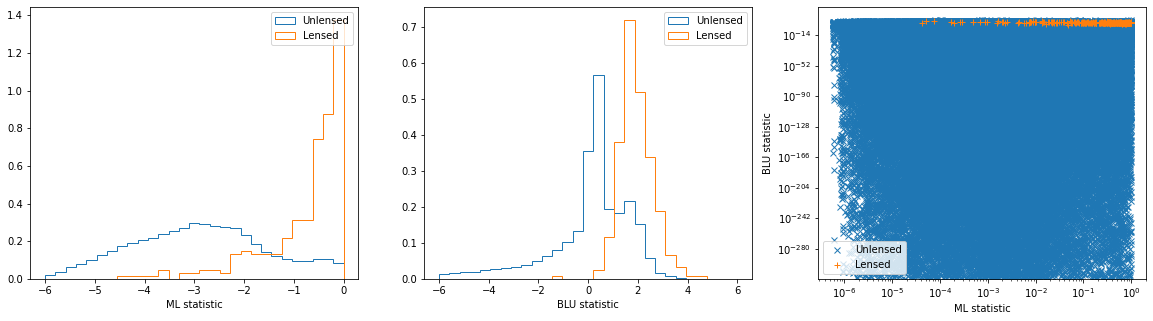

In [15]:
df_test=df_test_qts
ml_stat='xgb_dense_QTS_0'
blu_stat= 'm1, m2'
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.xlabel('ML statistic')
bins=np.linspace(-6,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
#plt.ylim(0,300)
plt.subplot(132)
plt.xlabel('BLU statistic')
bins=np.linspace(-6,6,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
#plt.ylim(0,300)
plt.subplot(133)

plt.xlabel('ML statistic')
plt.ylabel('BLU statistic')
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat],df[blu_stat],'x',label='Unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat],df[blu_stat],'+',label='Lensed')
plt.legend()
plt.show()


/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


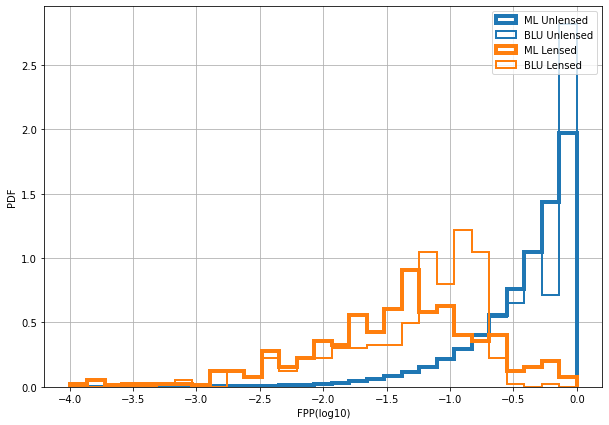

In [16]:
plt.figure(figsize=(10,7))
df_test[ml_stat+'_fpp']=get_fars(df_test,ml_stat,df_test,ml_stat)
df_test[blu_stat+'_fpp']=get_fars(df_test,blu_stat,df_test,blu_stat)
bins=np.linspace(-4,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()
plt.show()

ML H1 QTs auc = 0.8790
ML L1 QTs auc = 0.8695
ML V1 QTs auc = 0.8018
ML combined H1 L1 V1 QTS auc = 0.9040
$B^L_U:$ $m_1 m_2$ auc = 0.9164


/home/srashti.goyal/.local/lib/python3.7/site-packages/lensid/utils/ml_utils.py:847: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


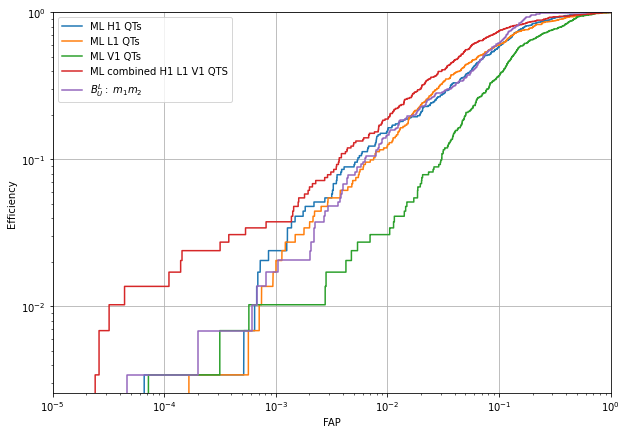

In [17]:
fig,rocs=plot_ROCs(df_test_qts,cols=['dense_H1_0' ,'dense_L1_0','dense_V1_0','xgb_dense_QTS_0','m1, m2']\
                     ,labels=['ML H1 QTs', 'ML L1 QTs', 'ML V1 QTs','ML combined H1 L1 V1 QTS', '$B^L_U:$ $m_1 m_2$'],logy=True)

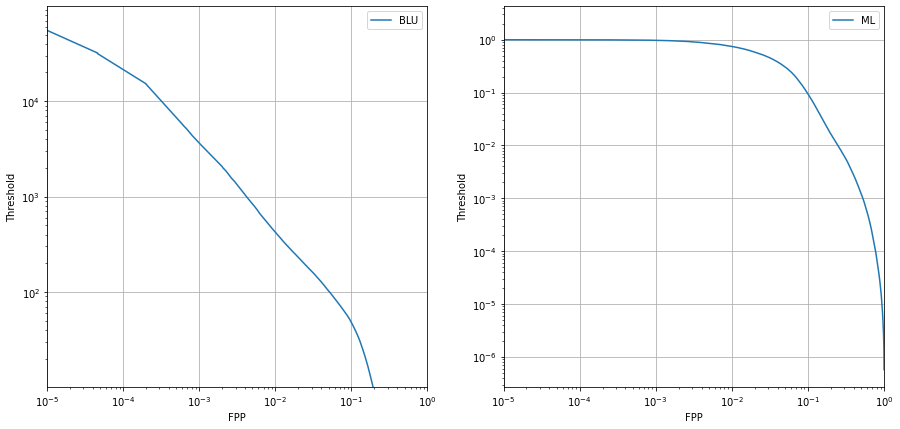

In [18]:
fpp_blu,eff_blu,thr_blu=rocs[blu_stat]
fpp_ml,eff_ml,thr_ml=rocs[ml_stat]

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(fpp_blu,thr_blu,label='BLU')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.ylim(np.percentile(thr_blu,10),np.max(thr_blu))
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.grid()
plt.subplot(122)
plt.plot(fpp_ml,thr_ml,label='ML')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.show()

In [19]:
#df_test_qts.to_csv('../../data/dataframes/test/ML_qts'+tag+'.csv')
df_test_qts.to_csv('/home/srashti.goyal/strong-lensing-ml/data/dataframes/test/ML_qts'+tag+'.csv')

In [20]:
indir= 'test'
#df_dir='../../data/dataframes/test/' ##alice
df_dir = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/test/' ##CIT

In [21]:
#blu_lensed = '../../data/dataframes/haris_et_al/Lensed_PE_blus.csv'
#blu_unlensed = '../../data/dataframes/haris_et_al/Unlensed_PE_blus.csv'

blu_lensed = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/haris_et_al/Lensed_PE_blus.csv'
blu_unlensed = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/haris_et_al/Unlensed_PE_blus.csv'



In [26]:
tag='_kaggle'
df_lensed_qts = pd.read_csv(df_dir+'lensed_QTs'+tag+'.csv',index_col=[0] )
df_unlensed_qts = pd.read_csv(df_dir+'unlensed_QTs'+tag+'.csv' ,index_col=[0])


df_test_blu_lensed = pd.read_csv(blu_lensed,index_col=[0] )
df_test_blu_unlensed = pd.read_csv(blu_unlensed,index_col=[0] )
cols=['m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2']
df_lensed_qts=df_lensed_qts.join(df_test_blu_lensed[cols])
df_unlensed_qts=df_unlensed_qts.join(df_test_blu_unlensed[cols])
df_test_qts = pd.concat([df_lensed_qts,df_unlensed_qts],ignore_index = True)
df_test_qts=df_test_qts.sample(frac = 1).reset_index(drop = True)

In [27]:
df_test_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,...,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec","# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2","m1, m2, ra, sin_dec","m1, m2"
499787,616644500.000000000-233289,627381500.000000000-254763,0,0.840339,7149.238281,0.107359,4720.675781,0.027961,7351.779297,0.109158,...,0.112011,7869.400391,0.114993,4747.774902,8.600599e-212,0.000000e+00,0.000000,1.209938e-238,0.000000e+00,7.352508e-02
499788,532986000.000000000-65972,693849000.000000000-387698,0,0.108000,7506.585938,0.109281,4192.849609,0.413595,7080.777344,0.104022,...,0.785893,7935.625488,0.114236,4710.422852,1.580575e-12,1.316643e-07,0.003763,9.742792e-12,8.079788e-06,1.041311e-01
499789,511541500.000000000-23083,521658000.000000000-43316,0,0.060661,7337.170898,0.110634,5040.249023,0.000215,6311.310547,0.098602,...,0.017074,7013.840820,0.110789,5183.331055,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,6.537896e-182
499790,684588500.000000000-369177,570135500.000000000-140271,0,0.989811,6580.463867,0.102789,5309.110352,0.962866,6380.983398,0.100058,...,0.994334,7789.645020,0.113625,5109.035156,3.670191e-49,2.977195e-36,0.193323,2.847729e-51,6.942316e-37,2.566244e-31
499791,625924500.000000000-251849,550492000.000000000-100984,0,0.610944,6800.362305,0.101343,5513.996094,0.207743,6647.455078,0.099854,...,0.231387,7359.390625,0.105922,5030.790039,2.574542e-12,3.579946e-10,0.007049,3.365701e-12,2.819541e-10,8.990119e-12


In [28]:
xgboost_dense_qts_model = joblib.load('out/XGBQT_0'+tag+'.pkl')

In [29]:
df_test_qts=predict_xgboost_dense_qts(df_test_qts,xgboost_dense_qts_model)
df_test_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,...,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec","# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2","m1, m2, ra, sin_dec","m1, m2",xgb_dense_QTS_0
499787,616644500.000000000-233289,627381500.000000000-254763,0,0.840339,7149.238281,0.107359,4720.675781,0.027961,7351.779297,0.109158,...,7869.400391,0.114993,4747.774902,8.600599e-212,0.000000e+00,0.000000,1.209938e-238,0.000000e+00,7.352508e-02,0.000152
499788,532986000.000000000-65972,693849000.000000000-387698,0,0.108000,7506.585938,0.109281,4192.849609,0.413595,7080.777344,0.104022,...,7935.625488,0.114236,4710.422852,1.580575e-12,1.316643e-07,0.003763,9.742792e-12,8.079788e-06,1.041311e-01,0.000179
499789,511541500.000000000-23083,521658000.000000000-43316,0,0.060661,7337.170898,0.110634,5040.249023,0.000215,6311.310547,0.098602,...,7013.840820,0.110789,5183.331055,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,6.537896e-182,0.000006
499790,684588500.000000000-369177,570135500.000000000-140271,0,0.989811,6580.463867,0.102789,5309.110352,0.962866,6380.983398,0.100058,...,7789.645020,0.113625,5109.035156,3.670191e-49,2.977195e-36,0.193323,2.847729e-51,6.942316e-37,2.566244e-31,0.256612
499791,625924500.000000000-251849,550492000.000000000-100984,0,0.610944,6800.362305,0.101343,5513.996094,0.207743,6647.455078,0.099854,...,7359.390625,0.105922,5030.790039,2.574542e-12,3.579946e-10,0.007049,3.365701e-12,2.819541e-10,8.990119e-12,0.001386


In [30]:
df_test_qts=df_test_qts.dropna()

ML H1 QTs auc = 0.8790
ML L1 QTs auc = 0.8695
ML V1 QTs auc = 0.8018
ML combined H1 L1 V1 QTS auc = 0.9021
$B^L_U:$ $m_1 m_2$ auc = 0.9164


/home/srashti.goyal/.local/lib/python3.7/site-packages/lensid/utils/ml_utils.py:847: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


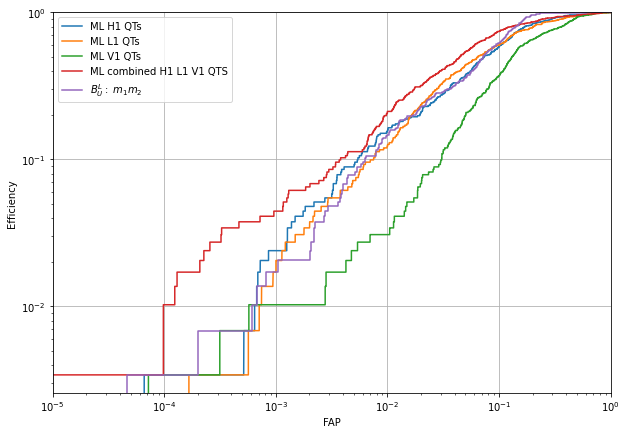

In [31]:
fig=plot_ROCs(df_test_qts,cols=['dense_H1_0' ,'dense_L1_0','dense_V1_0','xgb_dense_QTS_0','m1, m2']\
                     ,labels=['ML H1 QTs', 'ML L1 QTs', 'ML V1 QTs','ML combined H1 L1 V1 QTS', '$B^L_U:$ $m_1 m_2$'],logy=True)

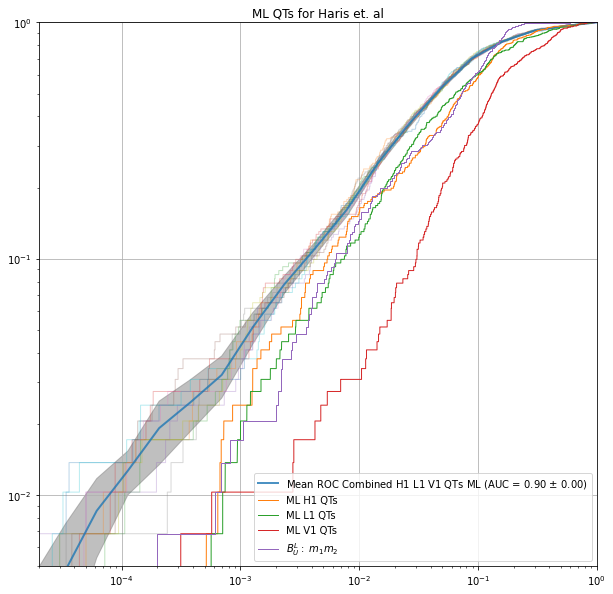

In [32]:
from sklearn.metrics import plot_roc_curve
plt.rcParams["figure.figsize"] = (10,10)

tprs = []
aucs = []

mean_fpr = 10**np.linspace(-5,0,20)
    
fig,ax = plt.subplots()
cols=['dense_H1_0','dense_L1_0','dense_V1_0']

for i in range(1,11):
    xgb_qt_cv = joblib.load("../training_cv/out/XGBQT_"+str(i)+tag+".pkl")
    df = predict_xgboost_dense_qts(df_test_qts,xgb_qt_cv)
    df_test_qts['xgb_dense_QTS_' +str(i) ]=df['xgb_dense_QTS_0']

    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test_qts.Lensing.values, df_test_qts['xgb_dense_QTS_' +str(i)])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    ax.plot(false_positive_rate,true_positive_rate,alpha=0.3,lw=1)
    interp_tpr = np.interp(mean_fpr,false_positive_rate,true_positive_rate)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    

    
mean_tpr = np.mean(tprs,axis = 0)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr,mean_tpr,label = r'Mean ROC Combined H1 L1 V1 QTs ML (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc , std_auc),lw = 2,alpha=.8)
    
std_tpr = np.std(tprs,axis=0)
tprs_upper = np.minimum(mean_tpr +std_tpr,1)
tprs_lower = np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color="grey",alpha=.5)


colors=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
cols=['dense_H1_0' ,'dense_L1_0','dense_V1_0','m1, m2']

labels=['ML H1 QTs', 'ML L1 QTs', 'ML V1 QTs', '$B^L_U:$ $m_1 m_2$']

for i,col in enumerate(cols):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test_qts.Lensing.values, df_test_qts[col])
    plt.plot(false_positive_rate,true_positive_rate,'-',label=labels[i],lw=1)

#ax.set(xlim=[2e-5,1],ylim=[-0.05,1.05],title = "ML Skymaps for Haris et. al",xscale='log')

ax.set(xlim=[2e-5,1],ylim=[5e-3,1],title = "ML QTs for Haris et. al",xscale='log',yscale='log')
ax.grid()
ax.legend(loc ="lower right")
#plt.savefig('ROC-log-QTs-xgb'+tag+'.png')

plt.show()


In [33]:
df_test_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,...,xgb_dense_QTS_1,xgb_dense_QTS_2,xgb_dense_QTS_3,xgb_dense_QTS_4,xgb_dense_QTS_5,xgb_dense_QTS_6,xgb_dense_QTS_7,xgb_dense_QTS_8,xgb_dense_QTS_9,xgb_dense_QTS_10
499787,616644500.000000000-233289,627381500.000000000-254763,0,0.840339,7149.238281,0.107359,4720.675781,0.027961,7351.779297,0.109158,...,0.000341,0.000063,0.000156,0.000135,0.000113,0.000087,0.000080,0.000177,0.000301,0.000199
499788,532986000.000000000-65972,693849000.000000000-387698,0,0.108000,7506.585938,0.109281,4192.849609,0.413595,7080.777344,0.104022,...,0.000331,0.000433,0.000214,0.000182,0.000060,0.000135,0.000155,0.000115,0.000220,0.000131
499789,511541500.000000000-23083,521658000.000000000-43316,0,0.060661,7337.170898,0.110634,5040.249023,0.000215,6311.310547,0.098602,...,0.000012,0.000004,0.000008,0.000014,0.000005,0.000015,0.000011,0.000003,0.000005,0.000003
499790,684588500.000000000-369177,570135500.000000000-140271,0,0.989811,6580.463867,0.102789,5309.110352,0.962866,6380.983398,0.100058,...,0.171477,0.299450,0.244690,0.138859,0.170251,0.147385,0.416872,0.159218,0.206325,0.141087
499791,625924500.000000000-251849,550492000.000000000-100984,0,0.610944,6800.362305,0.101343,5513.996094,0.207743,6647.455078,0.099854,...,0.002017,0.004698,0.001540,0.002096,0.001132,0.001981,0.001119,0.000935,0.001815,0.000666


In [35]:
#df_test_qts.to_csv('../../data/dataframes/test/ML_qts'+tag+'.csv')
df_test_qts.to_csv('/home/srashti.goyal/strong-lensing-ml/data/dataframes/test/ML_qts'+tag+'.csv')

/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


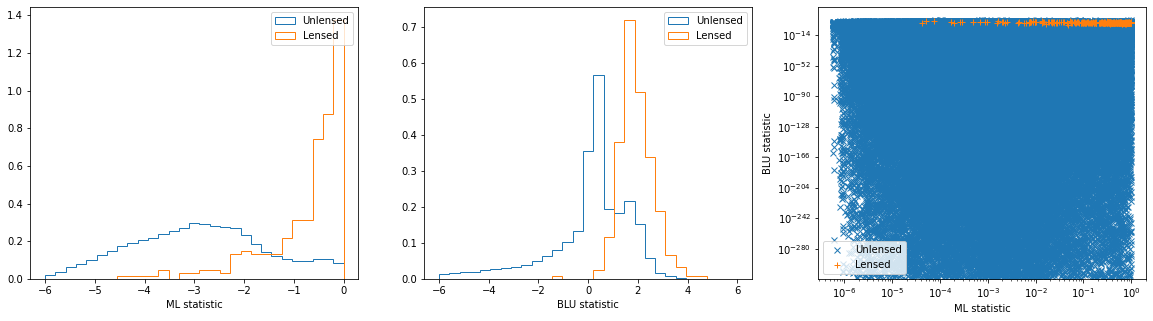

In [36]:
df_test=df_test_qts
ml_stat='xgb_dense_QTS_0'
blu_stat= 'm1, m2'
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.xlabel('ML statistic')
bins=np.linspace(-6,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
#plt.ylim(0,300)
plt.subplot(132)
plt.xlabel('BLU statistic')
bins=np.linspace(-6,6,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
#plt.ylim(0,300)
plt.subplot(133)

plt.xlabel('ML statistic')
plt.ylabel('BLU statistic')
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat],df[blu_stat],'x',label='Unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat],df[blu_stat],'+',label='Lensed')
plt.legend()
plt.show()


/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


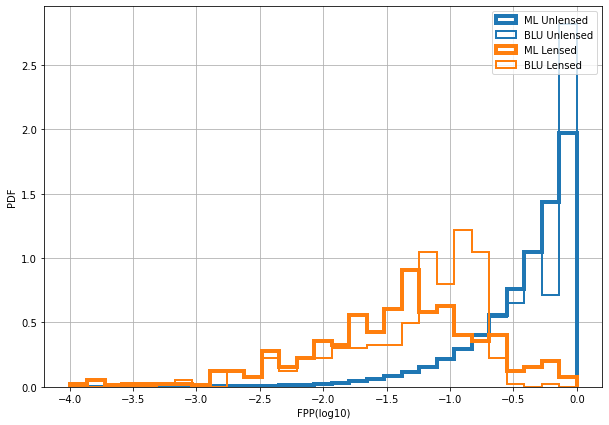

In [37]:
plt.figure(figsize=(10,7))
df_test[ml_stat+'_fpp']=get_fars(df_test,ml_stat,df_test,ml_stat)
df_test[blu_stat+'_fpp']=get_fars(df_test,blu_stat,df_test,blu_stat)
bins=np.linspace(-4,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()
plt.show()

ML H1 QTs auc = 0.8790
ML L1 QTs auc = 0.8695
ML V1 QTs auc = 0.8018
ML combined H1 L1 V1 QTS auc = 0.9040
$B^L_U:$ $m_1 m_2$ auc = 0.9164


/home/srashti.goyal/.local/lib/python3.7/site-packages/lensid/utils/ml_utils.py:847: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


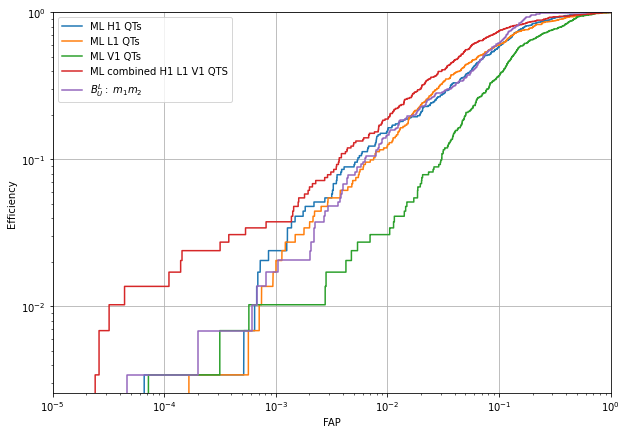

In [38]:
fig,rocs=plot_ROCs(df_test_qts,cols=['dense_H1_0' ,'dense_L1_0','dense_V1_0','xgb_dense_QTS_0','m1, m2']\
                     ,labels=['ML H1 QTs', 'ML L1 QTs', 'ML V1 QTs','ML combined H1 L1 V1 QTS', '$B^L_U:$ $m_1 m_2$'],logy=True)

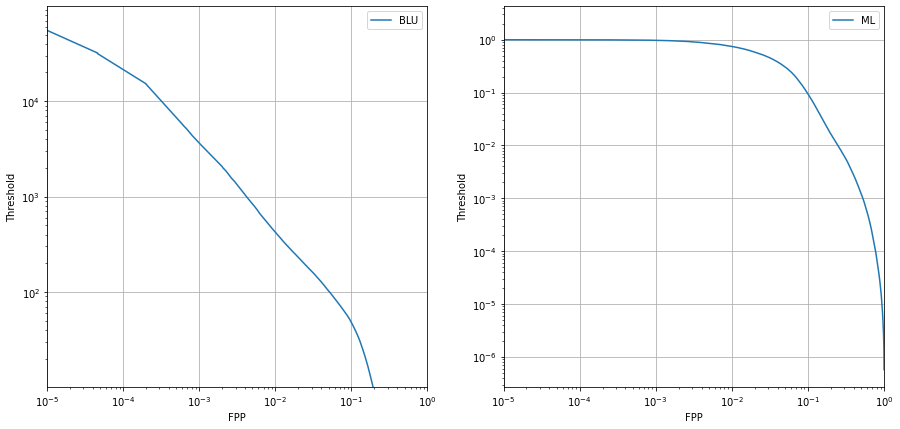

In [39]:
fpp_blu,eff_blu,thr_blu=rocs[blu_stat]
fpp_ml,eff_ml,thr_ml=rocs[ml_stat]

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(fpp_blu,thr_blu,label='BLU')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.ylim(np.percentile(thr_blu,10),np.max(thr_blu))
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.grid()
plt.subplot(122)
plt.plot(fpp_ml,thr_ml,label='ML')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.show()

In [40]:
#df_test_qts.to_csv('../../data/dataframes/test/ML_qts'+tag+'.csv')
df_test_qts.to_csv('/home/srashti.goyal/strong-lensing-ml/data/dataframes/test/ML_qts'+tag+'.csv')